EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 436.218 seconds.
128 nodes, per-node= <8 heavy+ 16 light>
Total size 157.0703125 kbytes, 
Heavy part: 135.0703125 kbytes
Light part: 22.0 kbytes
Precision:  0.477


C:\Users\PERO\Python\Proposal\20220101\hg\Func.py:148: RuntimeWarning: overflow encountered in long_scalars
  all_aae+=abs(estimate-gt_dict[item])


heavy_are: 3.256,heavy_aae:24766.000
all_are:3353.413,all_aae:1187.052
Estimate time:   5.966 seconds.


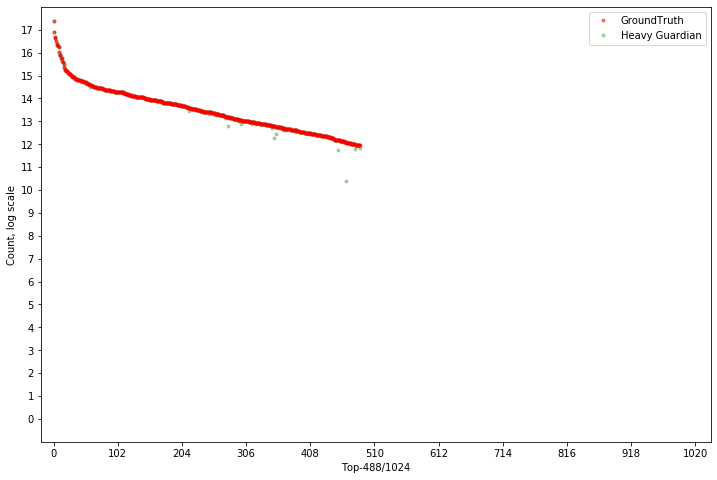

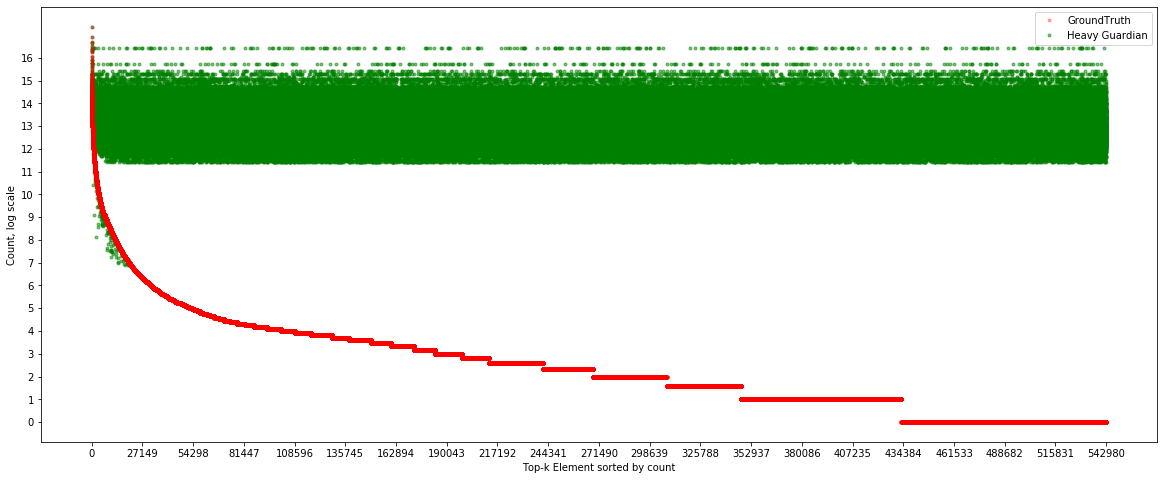

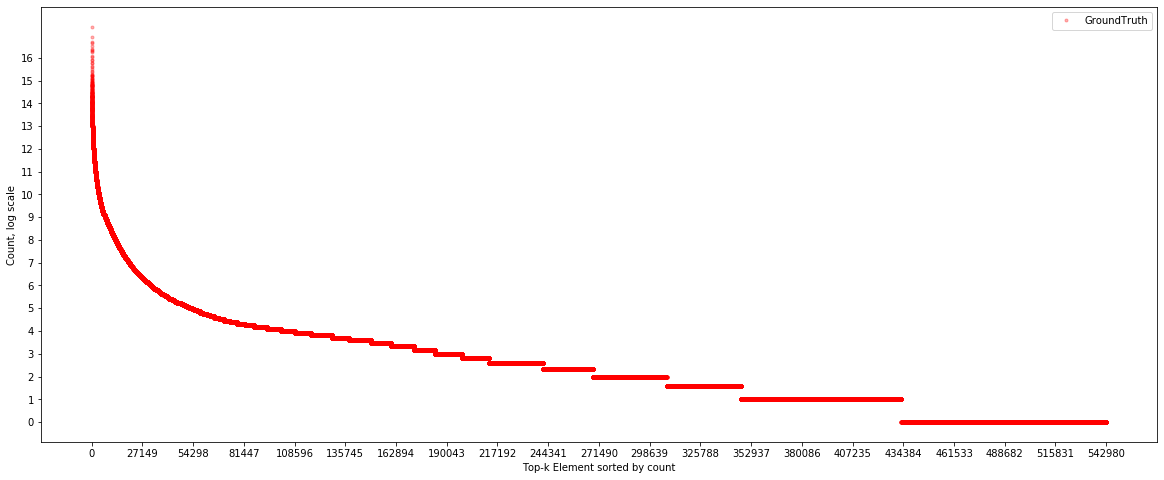

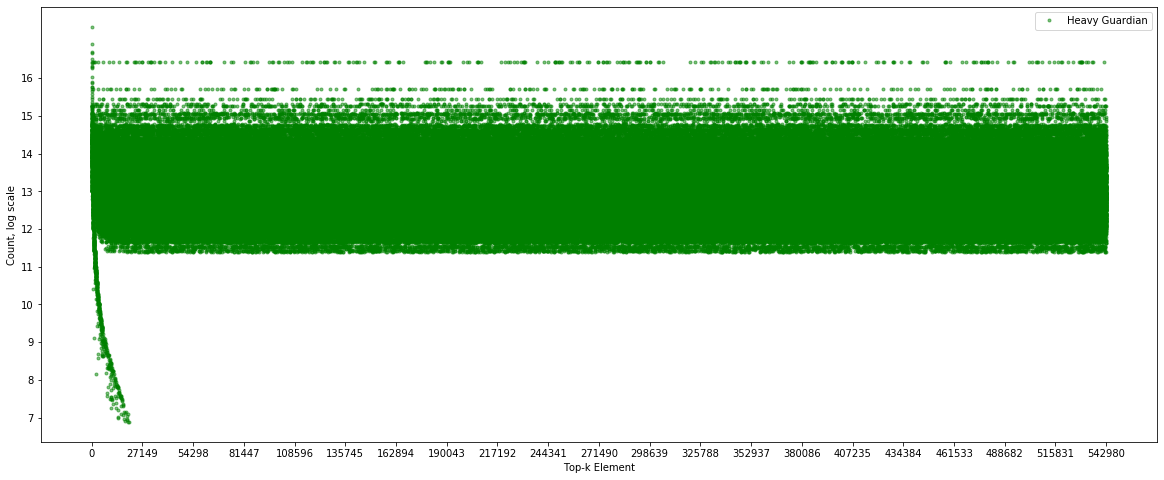

FileNotFoundError: [Errno 2] No such file or directory: '..\\result\\HG\\caida\\128_8\\HG_Top_1024_caida.csv'

In [3]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time

import re
from pympler import asizeof
dataset='caida'

# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
    # ground truth of srcip
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
heavy_size=8
light_size=16
size=128
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:    
                # Heavy part insert
                #item_count-=1
                e=str(e[:4])
                # =================read src ip field only===================                
                item=HG.Node(e,1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 384.818 seconds.
200 nodes, per-node= <8 heavy+ 16 light>
Total size 260.5390625 kbytes, 
Heavy part: 226.1640625 kbytes
Light part: 34.375 kbytes
Precision:  0.614


C:\Users\PERO\Python\Proposal\20220101\hg\Func.py:148: RuntimeWarning: overflow encountered in long_scalars
  all_aae+=abs(estimate-gt_dict[item])


heavy_are: 6.222,heavy_aae:49692.000
all_are:1926.050,all_aae:-2700.533
Estimate time:   6.332 seconds.


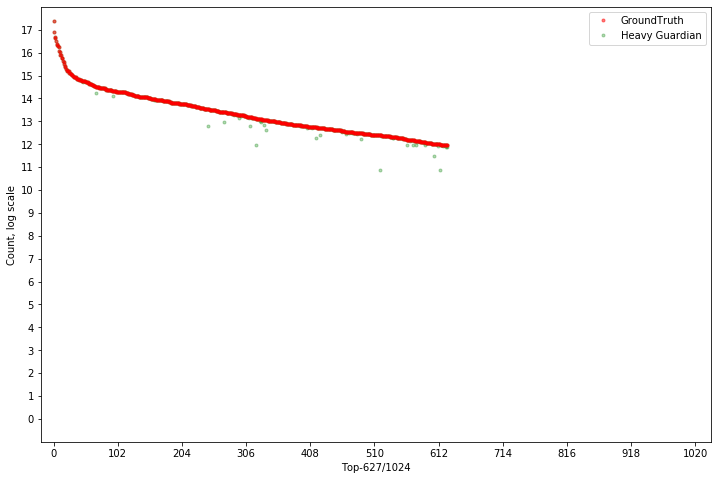

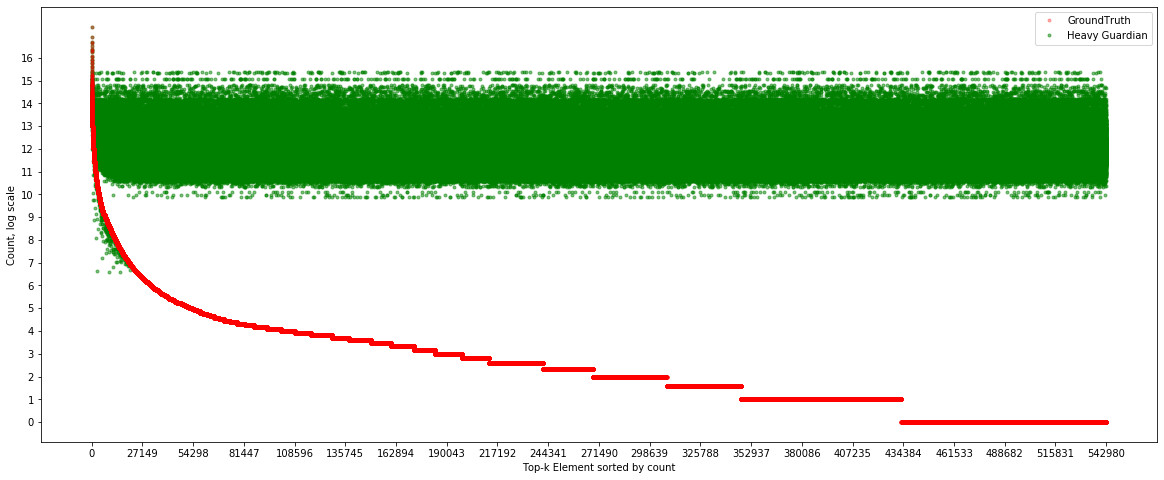

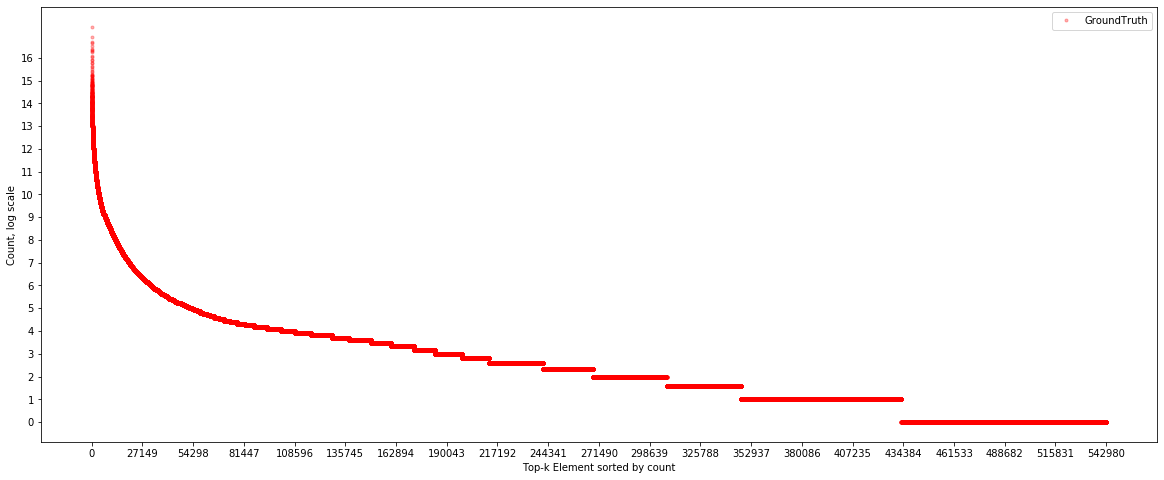

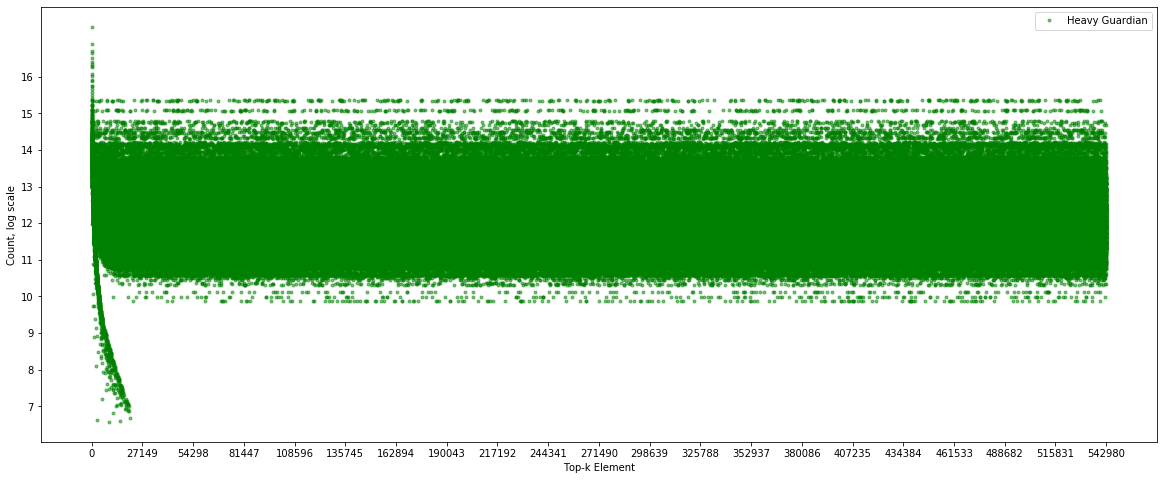

In [13]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time

import re
from pympler import asizeof
dataset='caida'

# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
    # ground truth of srcip
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
heavy_size=8
light_size=16
size=200
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:    
                # Heavy part insert
                #item_count-=1
                e=str(e[:4])
                # =================read src ip field only===================                
                item=HG.Node(e,1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 351.218 seconds.
300 nodes, per-node= <8 heavy+ 16 light>
Total size 353.765625 kbytes, 
Heavy part: 302.203125 kbytes
Light part: 51.5625 kbytes
Precision:  0.733
heavy_are: 9.926,heavy_aae:79112.000
all_are:1135.384,all_aae:3073.612
Estimate time:   6.608 seconds.


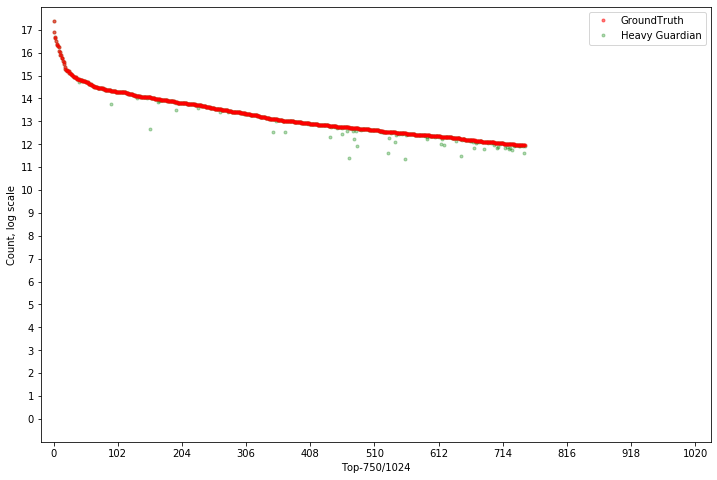

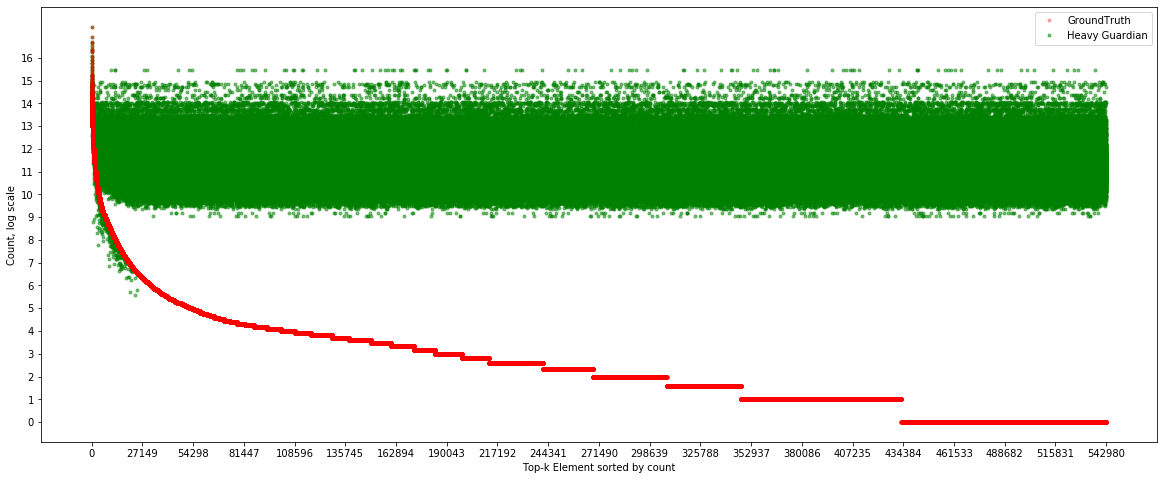

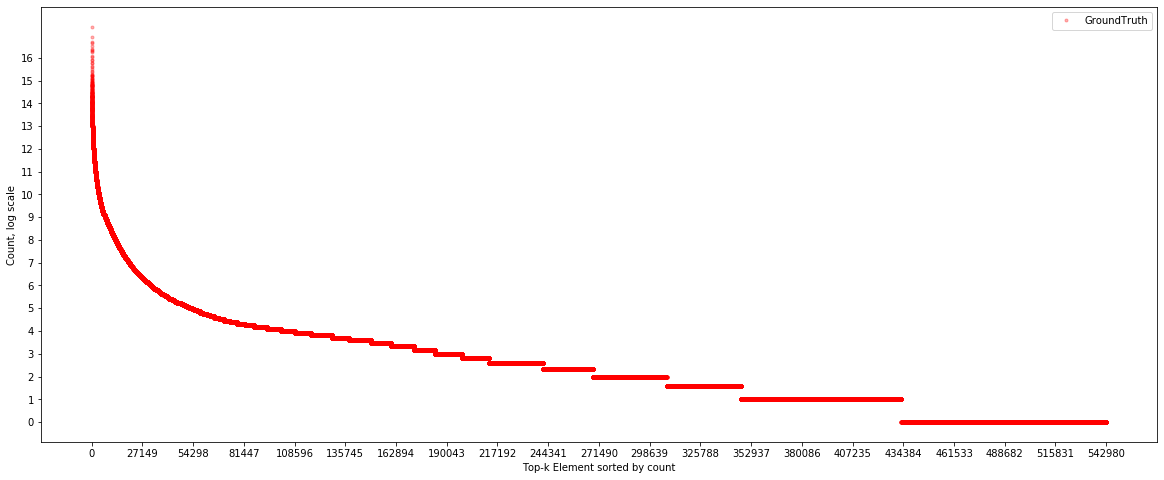

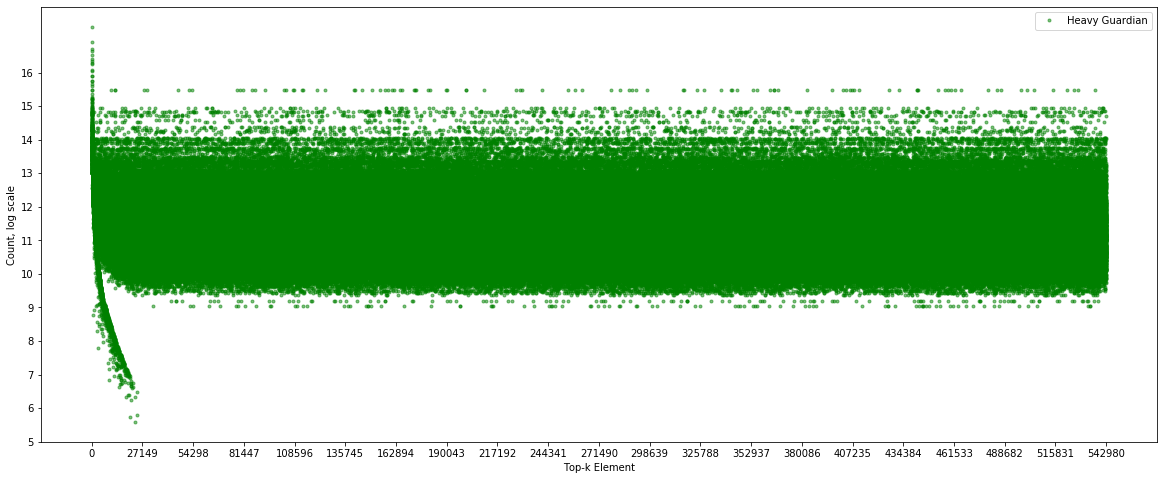

In [14]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time

import re
from pympler import asizeof
dataset='caida'

# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
    # ground truth of srcip
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
heavy_size=8
light_size=16
size=300
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:    
                # Heavy part insert
                #item_count-=1
                e=str(e[:4])
                # =================read src ip field only===================                
                item=HG.Node(e,1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 343.501 seconds.
400 nodes, per-node= <8 heavy+ 16 light>
Total size 516.671875 kbytes, 
Heavy part: 447.921875 kbytes
Light part: 68.75 kbytes
Precision:  0.808
heavy_are: 6.066,heavy_aae:44999.000
all_are: 771.026,all_aae:2085.990
Estimate time:   6.899 seconds.


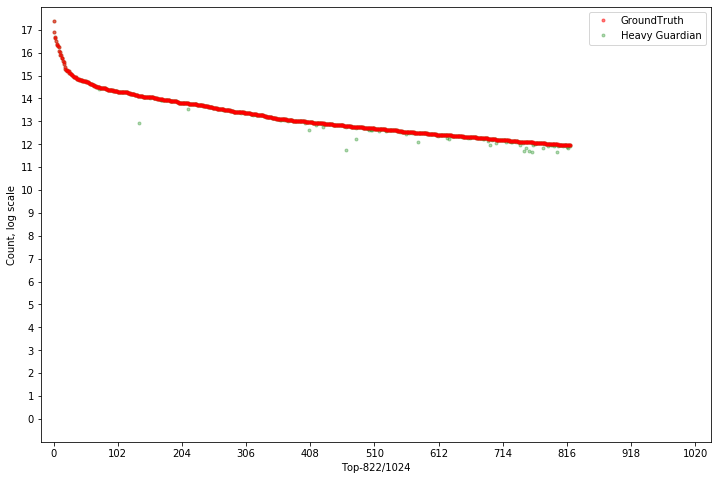

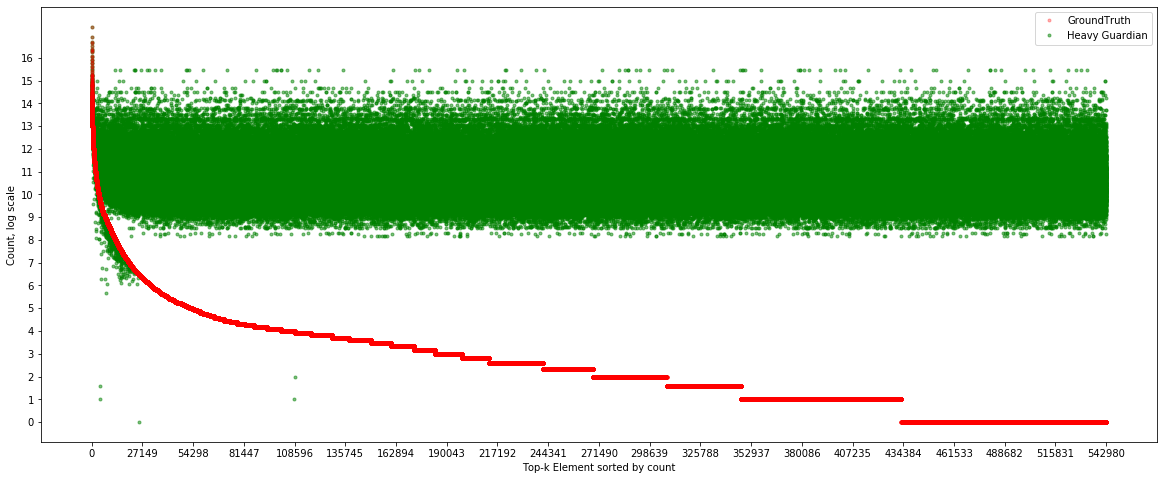

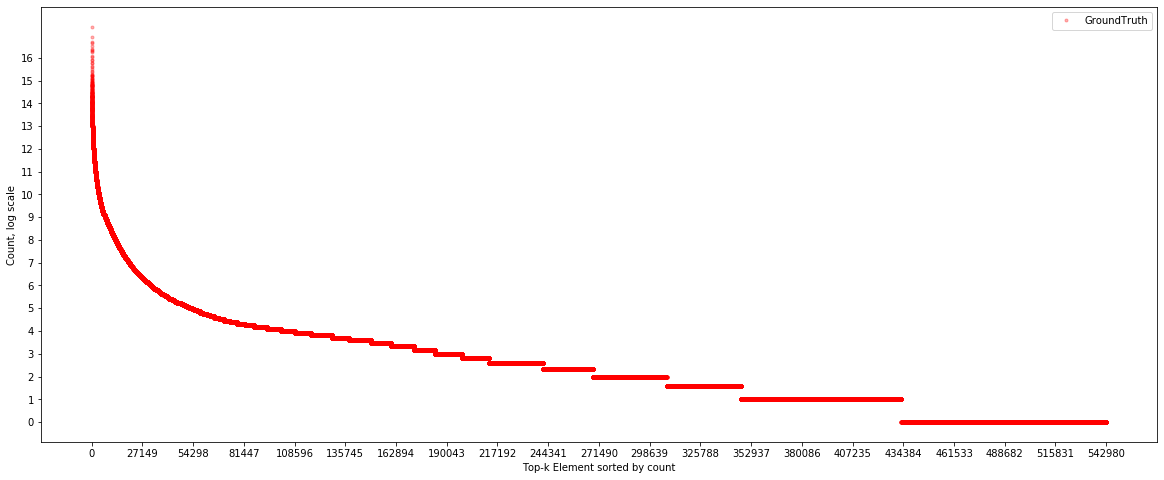

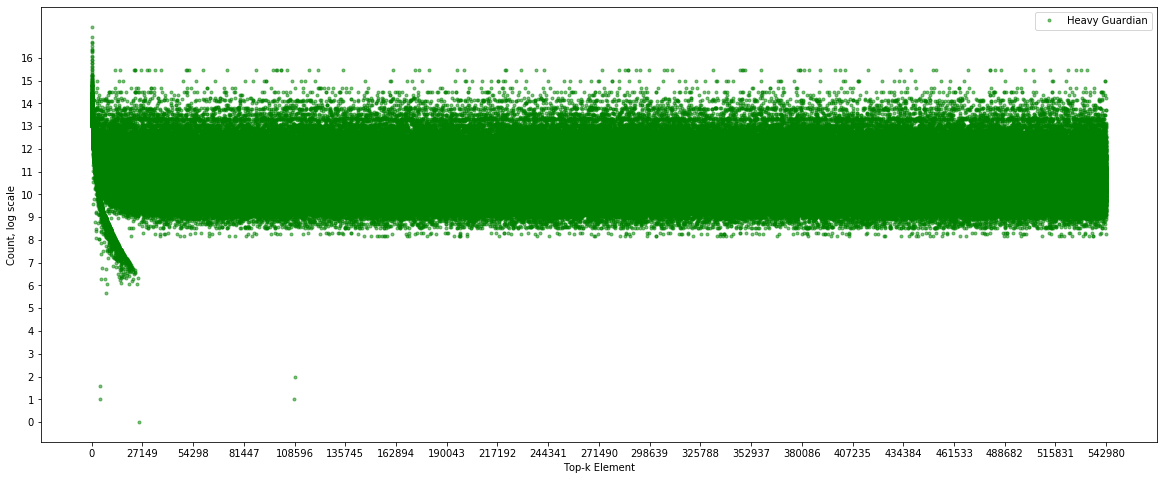

In [15]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time

import re
from pympler import asizeof
dataset='caida'

# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
    # ground truth of srcip
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
heavy_size=8
light_size=16
size=400
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:    
                # Heavy part insert
                #item_count-=1
                e=str(e[:4])
                # =================read src ip field only===================                
                item=HG.Node(e,1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 372.681 seconds.
500 nodes, per-node= <8 heavy+ 16 light>
Total size 606.109375 kbytes, 
Heavy part: 520.171875 kbytes
Light part: 85.9375 kbytes
Precision:  0.849
heavy_are: 5.014,heavy_aae:33224.000
all_are: 566.264,all_aae:1526.396
Estimate time:   6.955 seconds.


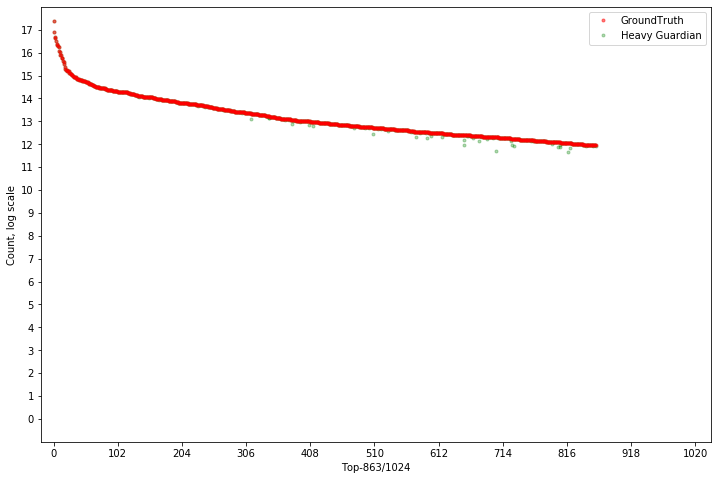

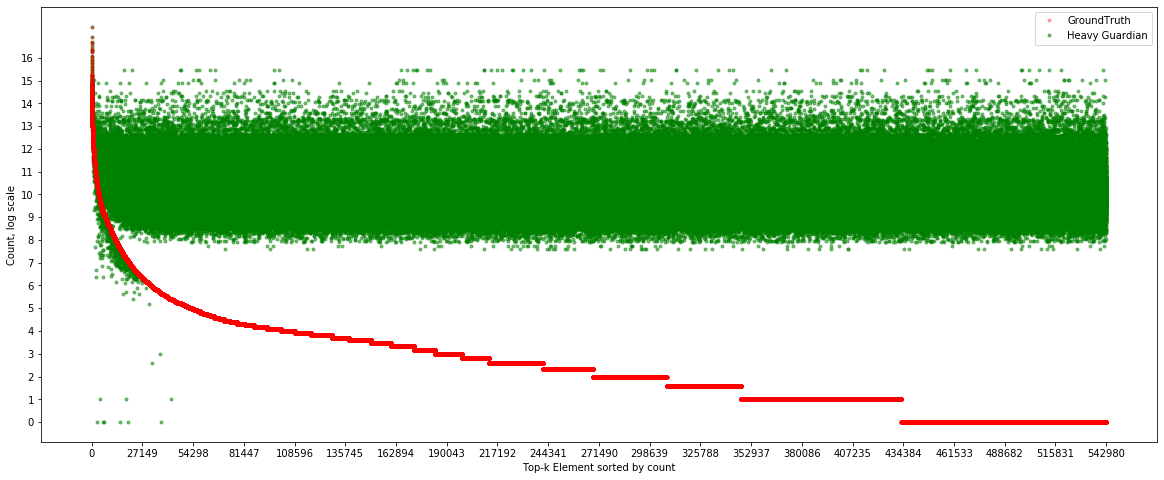

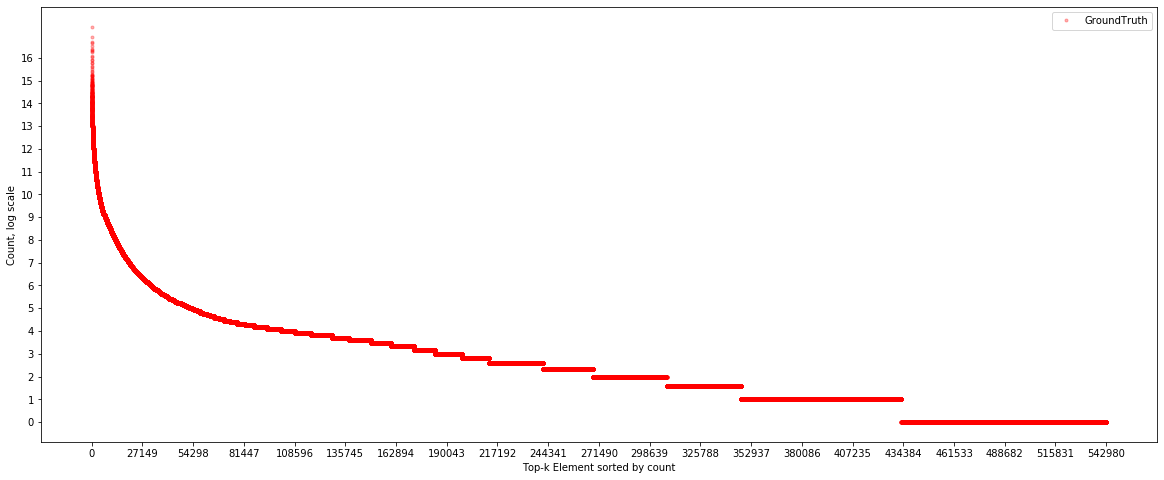

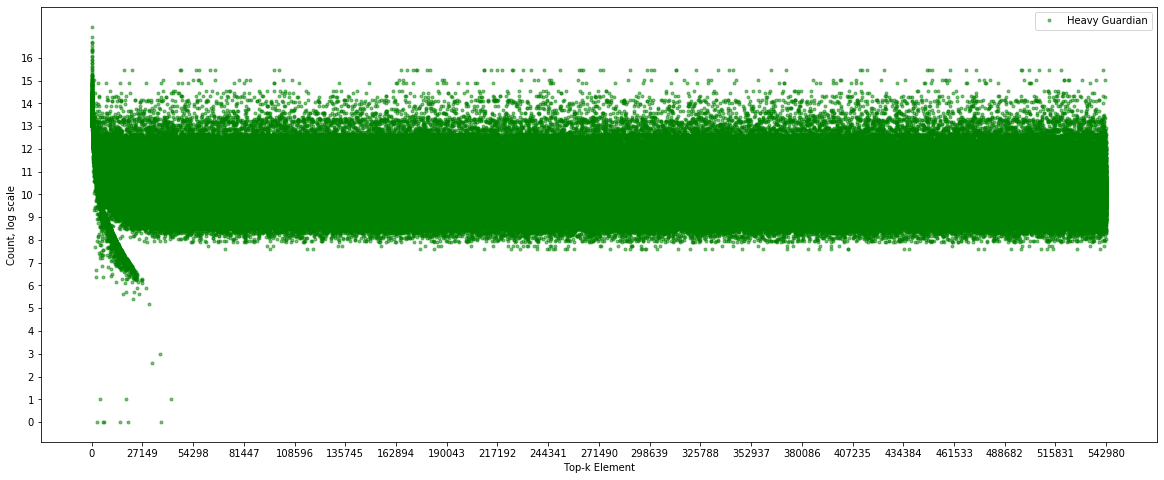

In [26]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time

import re
from pympler import asizeof
dataset='caida'

# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
    # ground truth of srcip
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
heavy_size=8
light_size=16
size=500
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:    
                # Heavy part insert
                #item_count-=1
                e=str(e[:4])
                # =================read src ip field only===================                
                item=HG.Node(e,1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 306.745 seconds.
600 nodes, per-node= <8 heavy+ 16 light>
Total size 694.5234375 kbytes, 
Heavy part: 591.3984375 kbytes
Light part: 103.125 kbytes
Precision:  0.882
heavy_are: 6.289,heavy_aae:59150.000
all_are: 430.650,all_aae:1157.000
Estimate time:   6.468 seconds.


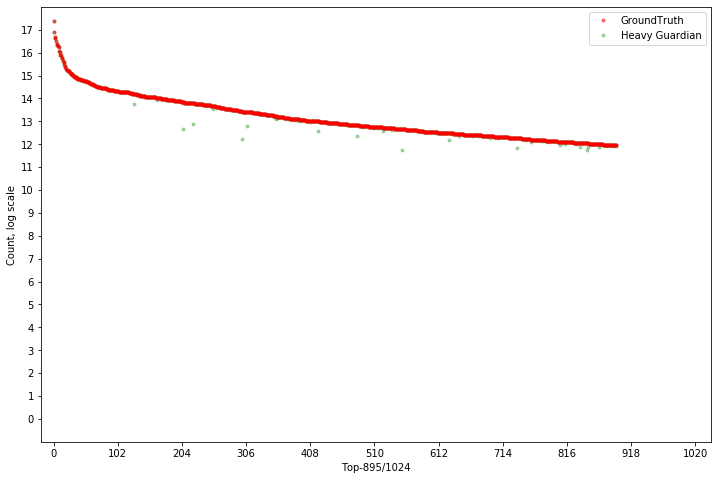

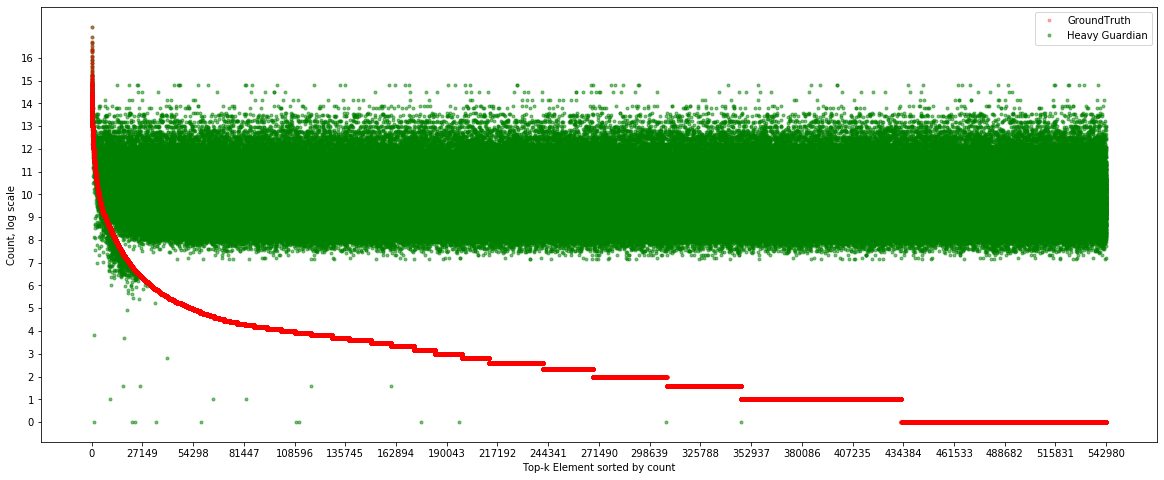

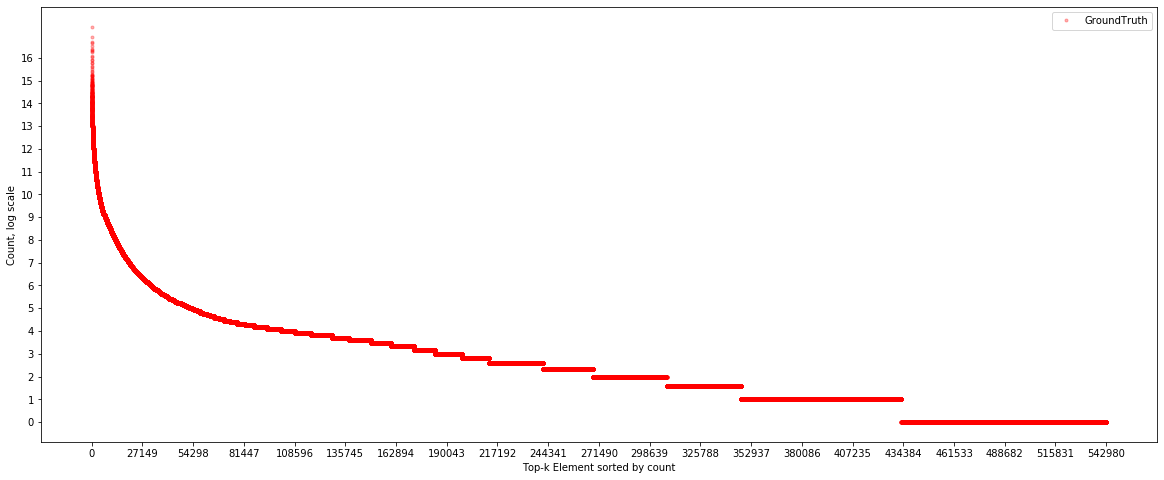

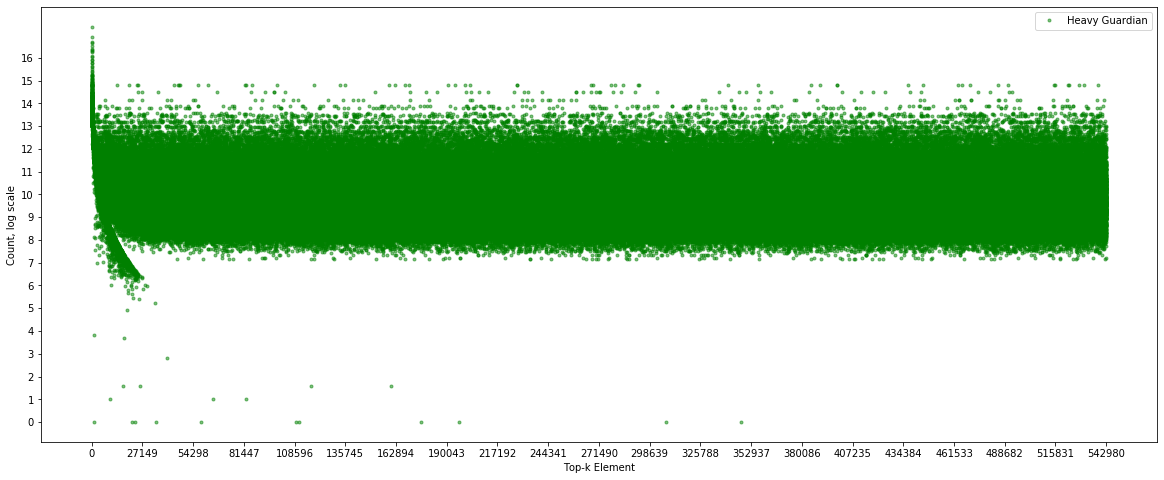

In [16]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time

import re
from pympler import asizeof
dataset='caida'

# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
    # ground truth of srcip
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
heavy_size=8
light_size=16
size=600
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:    
                # Heavy part insert
                #item_count-=1
                e=str(e[:4])
                # =================read src ip field only===================                
                item=HG.Node(e,1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 299.361 seconds.
700 nodes, per-node= <8 heavy+ 16 light>
Total size 928.3671875 kbytes, 
Heavy part: 808.0546875 kbytes
Light part: 120.3125 kbytes
Precision:  0.906
heavy_are: 5.457,heavy_aae:48395.000
all_are: 341.404,all_aae: 918.089
Estimate time:   6.521 seconds.


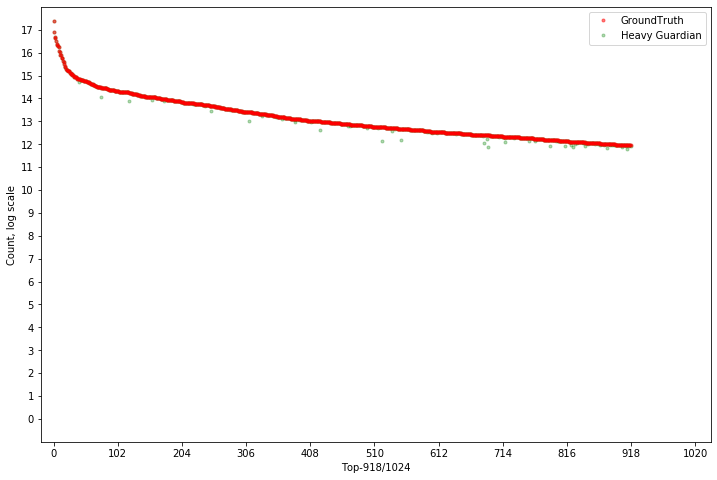

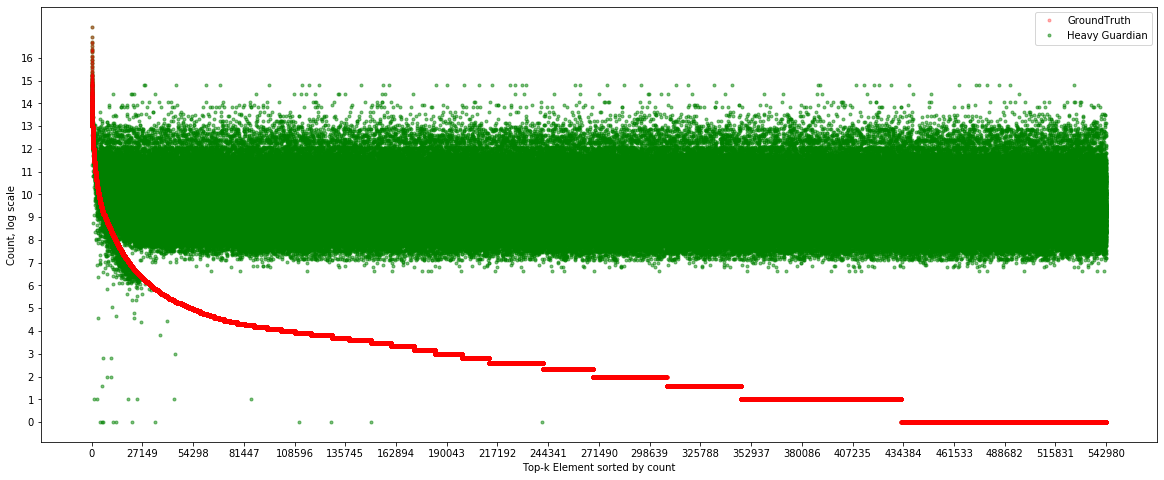

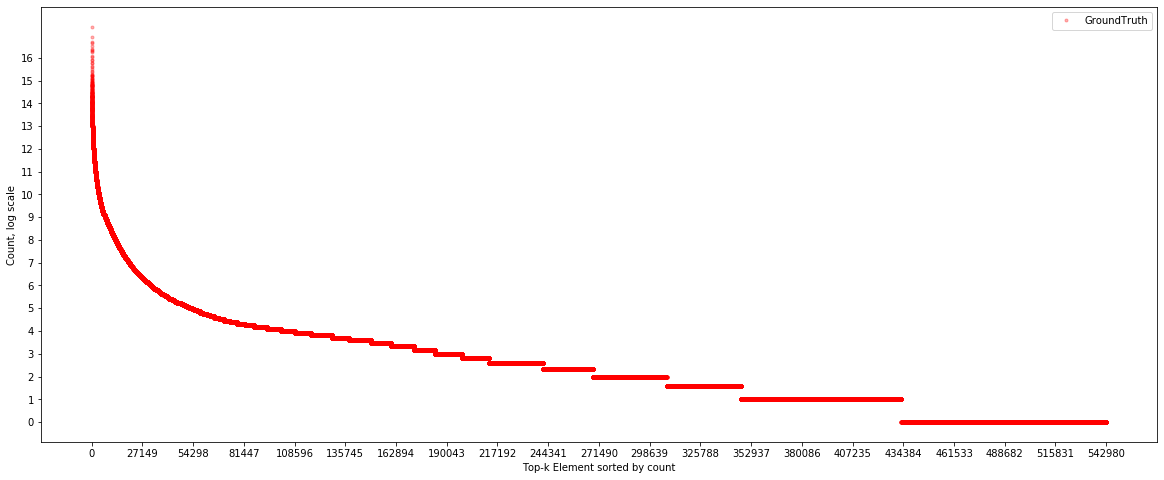

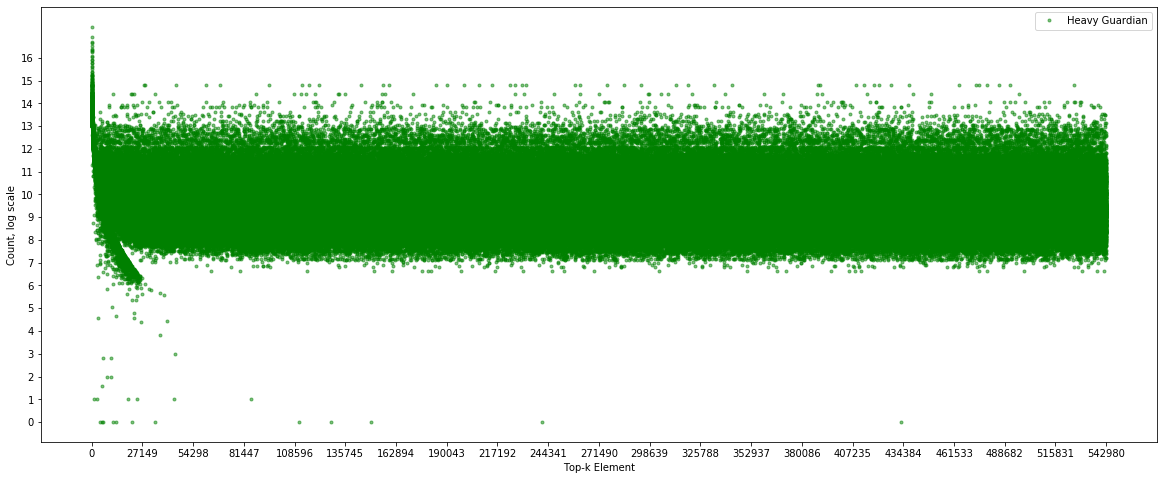

In [17]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time

import re
from pympler import asizeof
dataset='caida'

# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
    # ground truth of srcip
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
heavy_size=8
light_size=16
size=700
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:    
                # Heavy part insert
                #item_count-=1
                e=str(e[:4])
                # =================read src ip field only===================                
                item=HG.Node(e,1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)



EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
EOF
Execution time: 293.644 seconds.
800 nodes, per-node= <8 heavy+ 16 light>
Total size 1014.84375 kbytes, 
Heavy part: 877.34375 kbytes
Light part: 137.5 kbytes
Precision:  0.911
heavy_are: 4.835,heavy_aae:37964.000
all_are: 280.662,all_aae: 751.934
Estimate time:   7.046 seconds.


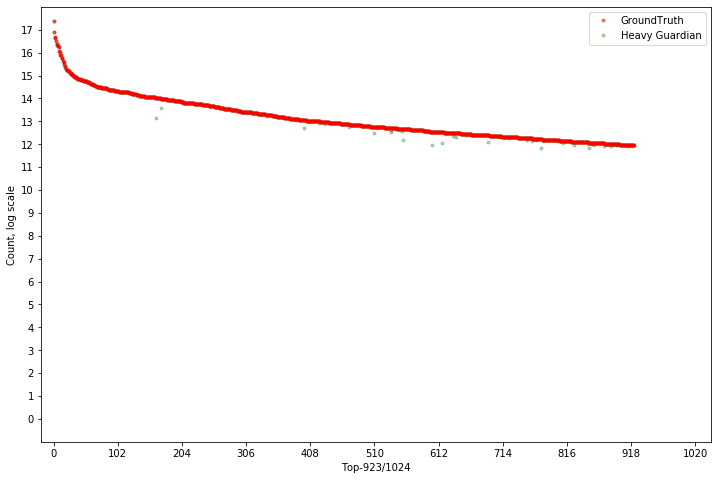

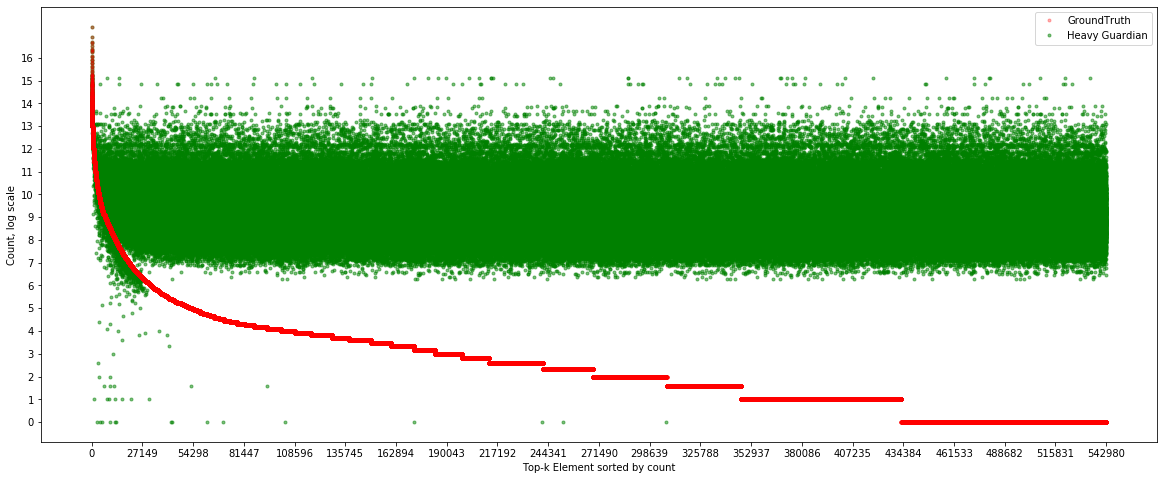

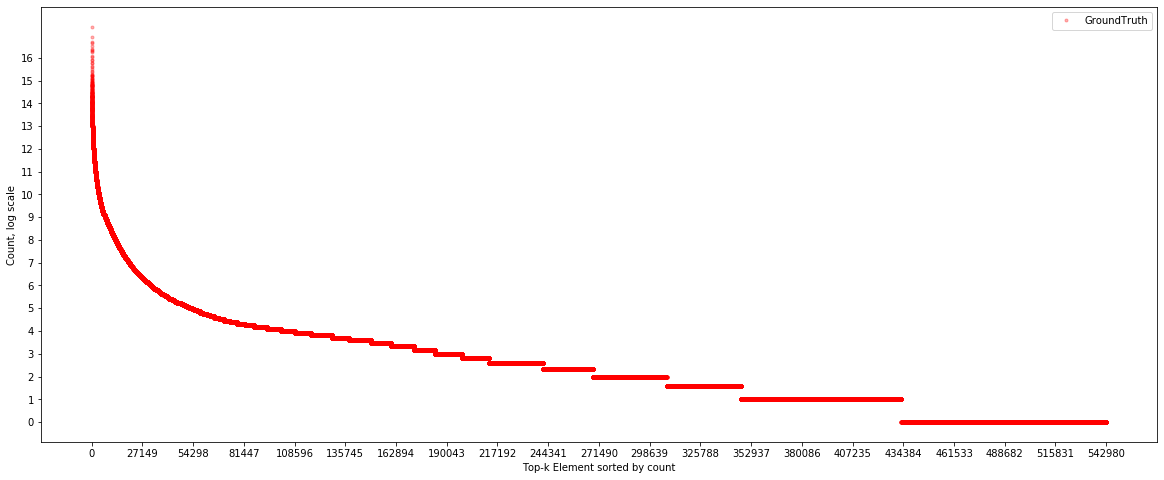

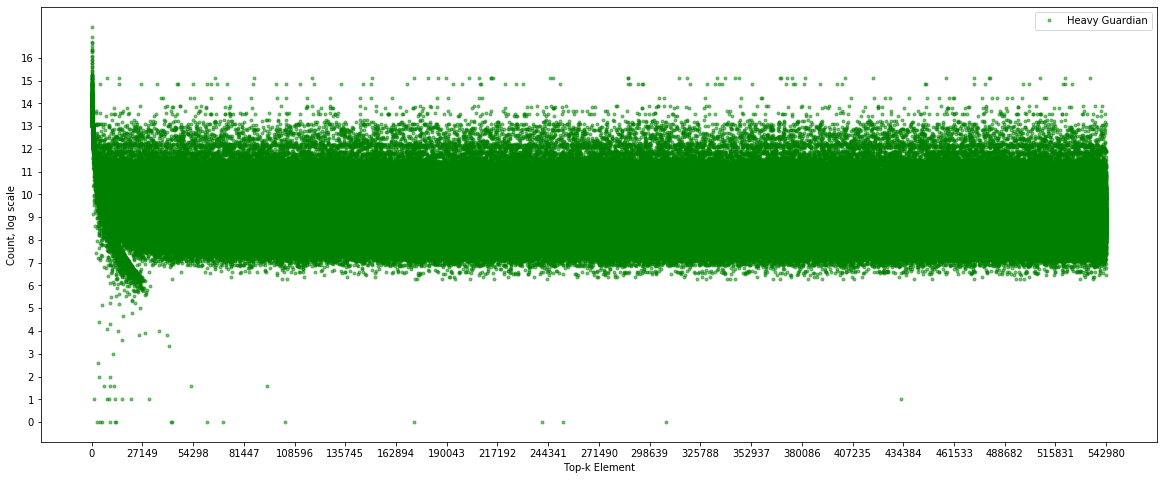

In [18]:
# 20220112 ok
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time

import re
from pympler import asizeof
dataset='caida'

# =============================dataset path and file=============================
filepath=r"..\..\dataset\caida"
pattern='\w+.dat$'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='srcip\caida_ground_truth.csv'
    # ground truth of srcip
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
heavy_size=8
light_size=16
size=800
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
for datafile in filelist[:]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'rb') as file:
         #以binary讀取，資料型態也為byte
        while True:
            e=file.read(13)
            if len(e)<13:
                print('EOF')
                break
            else:    
                # Heavy part insert
                #item_count-=1
                e=str(e[:4])
                # =================read src ip field only===================                
                item=HG.Node(e,1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)

